# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Generate Cities List

In [1]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

587

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#url = "http://api.openweathermap.org/data/2.5/weather?"
#units = "imperial"
#query_url = f"{url}appid={api_key}"

#target_url = query_url + city.replace(" ", "+") + units
#response = requests.get(target_url)
#response_json = response.json()
#response_json

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key   

city_data = []

print("Beginning Data Retrieval    ")
print("----------------------------")

#counters
record_num =1
set_num = 1

for i, city in enumerate(cities):
   #create groups of 50
    if (i% 50 == 0 and i >= 50):
        set_num += 1
        record_num = 0
        
    #url for the loop to run through
    city_url = query_url + "&q=" + city.replace(" ", "+")
    #print(city_url)
    
    print("Processing Record {} of Set {} | {}".format(record_num, set_num, city))
    
    #update record_num within the loop
    record_num += 1
    
    #request info on each city
    try:
        city_response = requests.get(city_url).json()
        
        #within this response find the data necessary for DataFrame
        city_lat = city_response["coord"]["lat"]
        city_lon = city_response["coord"]["lon"]
        city_max_temp = city_response["main"]["temp_max"]
        city_humidity = city_response["main"]["humidity"]
        city_cloudiness = city_response["clouds"]["all"]
        city_windspeed = city_response["wind"]["speed"]
        city_country = city_response["sys"]["country"]
        city_date = city_response["dt"]
        
        #append the city info to empty list
        city_data.append({"City": city,
                         "Lat": city_lat, 
                         "Lng": city_lon,
                         "Max Temp": city_max_temp, 
                         "Humidity": city_humidity, 
                         "Cloudiness": city_cloudiness, 
                         "Wind Speed": city_windspeed,
                         "Country": city_country, 
                         "Date": city_date})
    #if no city info is found, skip
    except:
        print("City not found. Skipping ...")
        pass
    
print("---------------------")
print("Data Retrieval Complete")
print("---------------------")    




Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | show low
Processing Record 2 of Set 1 | upernavik
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | lebu
Processing Record 5 of Set 1 | kaitong
Processing Record 6 of Set 1 | gorin
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | sabang
Processing Record 9 of Set 1 | karauzyak
City not found. Skipping ...
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | luderitz
Processing Record 12 of Set 1 | westport
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | castro
Processing Record 15 of Set 1 | fortuna
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | mahebourg
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | barentsburg
City not found. Skipping ...
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | bengkul

Processing Record 34 of Set 4 | kayes
Processing Record 35 of Set 4 | kupiskis
Processing Record 36 of Set 4 | yerbogachen
Processing Record 37 of Set 4 | kruisfontein
Processing Record 38 of Set 4 | geraldton
Processing Record 39 of Set 4 | chuy
Processing Record 40 of Set 4 | baykit
Processing Record 41 of Set 4 | miyako
Processing Record 42 of Set 4 | mitsamiouli
Processing Record 43 of Set 4 | kattivakkam
Processing Record 44 of Set 4 | yamada
Processing Record 45 of Set 4 | bestobe
Processing Record 46 of Set 4 | san patricio
Processing Record 47 of Set 4 | sao filipe
Processing Record 48 of Set 4 | nanortalik
Processing Record 49 of Set 4 | waipawa
Processing Record 0 of Set 5 | perth
Processing Record 1 of Set 5 | umzimvubu
City not found. Skipping ...
Processing Record 2 of Set 5 | wadi maliz
Processing Record 3 of Set 5 | ilmajoki
Processing Record 4 of Set 5 | misratah
Processing Record 5 of Set 5 | birin
Processing Record 6 of Set 5 | constitucion
Processing Record 7 of Set 

Processing Record 23 of Set 8 | saint-georges
Processing Record 24 of Set 8 | roebourne
Processing Record 25 of Set 8 | kalmunai
Processing Record 26 of Set 8 | oktyabrskiy
Processing Record 27 of Set 8 | awjilah
Processing Record 28 of Set 8 | aykhal
Processing Record 29 of Set 8 | inskoy
Processing Record 30 of Set 8 | te anau
Processing Record 31 of Set 8 | luwuk
Processing Record 32 of Set 8 | songjianghe
Processing Record 33 of Set 8 | acapulco
Processing Record 34 of Set 8 | aporawan
City not found. Skipping ...
Processing Record 35 of Set 8 | goianesia
Processing Record 36 of Set 8 | labuhan
Processing Record 37 of Set 8 | sinnamary
Processing Record 38 of Set 8 | sehithwa
Processing Record 39 of Set 8 | belokurikha
Processing Record 40 of Set 8 | berezovyy
Processing Record 41 of Set 8 | ahipara
Processing Record 42 of Set 8 | evanston
Processing Record 43 of Set 8 | tabas
Processing Record 44 of Set 8 | korla
Processing Record 45 of Set 8 | vila velha
Processing Record 46 of S

Processing Record 12 of Set 12 | hasanabad
Processing Record 13 of Set 12 | garowe
Processing Record 14 of Set 12 | krasnousolskiy
City not found. Skipping ...
Processing Record 15 of Set 12 | mittagong
Processing Record 16 of Set 12 | chifeng
Processing Record 17 of Set 12 | abancay
Processing Record 18 of Set 12 | anar darreh
City not found. Skipping ...
Processing Record 19 of Set 12 | porterville
Processing Record 20 of Set 12 | obidos
Processing Record 21 of Set 12 | ostrovnoy
Processing Record 22 of Set 12 | tunduru
City not found. Skipping ...
Processing Record 23 of Set 12 | esso
Processing Record 24 of Set 12 | tautira
Processing Record 25 of Set 12 | udachnyy
Processing Record 26 of Set 12 | durres
Processing Record 27 of Set 12 | altay
Processing Record 28 of Set 12 | sertania
Processing Record 29 of Set 12 | nanpiao
Processing Record 30 of Set 12 | vsevolodo-vilva
City not found. Skipping ...
Processing Record 31 of Set 12 | roald
Processing Record 32 of Set 12 | mullingar


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#city_dict = {'City': city, 'Lat': [lat], 'Lng': lon, 'Max Temp': max_temp, 'Humidity': humidity, 'Cloudiness': cloudiness, 'Wind Speed': windspeed, 'Country': country, 'Date': date}
city_df = pd.DataFrame(city_data)
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,show low,34.2542,-110.0298,41.00,24,1,9.22,US,1618645100
1,upernavik,72.7868,-56.1549,-10.37,93,79,6.60,GL,1618645101
2,barrow,71.2906,-156.7887,23.00,80,90,12.66,US,1618645101
3,lebu,-37.6167,-73.6500,52.14,82,24,4.63,CL,1618645102
4,kaitong,44.8135,123.1500,53.29,34,74,12.35,CN,1618645102
...,...,...,...,...,...,...,...,...,...
530,mullingar,53.5333,-7.3500,46.00,76,18,5.01,IE,1618645306
531,ust-kuyga,70.0167,135.6000,26.46,80,100,3.00,RU,1618645307
532,kouroussa,10.6500,-9.8833,78.49,67,81,7.36,GN,1618645307
533,slave lake,55.2834,-114.7690,41.00,60,90,1.12,CA,1618645308


In [6]:
city_df.to_csv("output.csv", index=False)

In [7]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,5.350000e+02
mean,20.670326,20.865605,59.877028,66.852336,54.960748,8.245944,1.618645e+09
std,33.121174,88.584427,22.417262,23.801824,39.516700,5.672233,7.924579e+01
min,-54.800000,-175.200000,-10.370000,1.000000,0.000000,0.450000,1.618645e+09
25%,-7.978050,-53.635500,46.000000,54.000000,14.000000,3.825000,1.618645e+09
50%,26.124700,26.687600,62.600000,72.000000,69.000000,6.910000,1.618645e+09
75%,48.509600,97.911400,77.720000,85.000000,96.000000,11.500000,1.618645e+09
max,78.218600,178.416700,102.740000,100.000000,100.000000,43.780000,1.618645e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.

idx = city_df.index[city_df['Humidity']]
idx

Int64Index([24, 93, 80, 82, 34, 88, 44, 65, 76, 28,
            ...
            76, 36, 96, 24, 45, 76, 80, 67, 60, 76],
           dtype='int64', length=535)

In [9]:

new_city_df = city_df.drop(city_df.loc[city_df['Humidity'] > 100].index)
new_city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,5.350000e+02
mean,20.670326,20.865605,59.877028,66.852336,54.960748,8.245944,1.618645e+09
std,33.121174,88.584427,22.417262,23.801824,39.516700,5.672233,7.924579e+01
min,-54.800000,-175.200000,-10.370000,1.000000,0.000000,0.450000,1.618645e+09
25%,-7.978050,-53.635500,46.000000,54.000000,14.000000,3.825000,1.618645e+09
50%,26.124700,26.687600,62.600000,72.000000,69.000000,6.910000,1.618645e+09
75%,48.509600,97.911400,77.720000,85.000000,96.000000,11.500000,1.618645e+09
max,78.218600,178.416700,102.740000,100.000000,100.000000,43.780000,1.618645e+09


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_df.drop(city_df.loc[city_df['Humidity'] > 100].index, inplace=False)
clean_city_data.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,show low,34.2542,-110.0298,41.00,24,1,9.22,US,1618645100
1,upernavik,72.7868,-56.1549,-10.37,93,79,6.60,GL,1618645101
2,barrow,71.2906,-156.7887,23.00,80,90,12.66,US,1618645101
3,lebu,-37.6167,-73.6500,52.14,82,24,4.63,CL,1618645102
4,kaitong,44.8135,123.1500,53.29,34,74,12.35,CN,1618645102


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

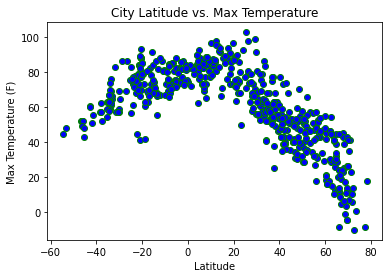

<Figure size 432x288 with 0 Axes>

In [11]:
x_axis = clean_city_data['Lat']
temp = clean_city_data['Max Temp']
                           
plt.scatter(x_axis, temp, marker="o", color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs. Max Temperature")
plt.show()
plt.savefig("images/maxtemp.png")

## Latitude vs. Humidity Plot

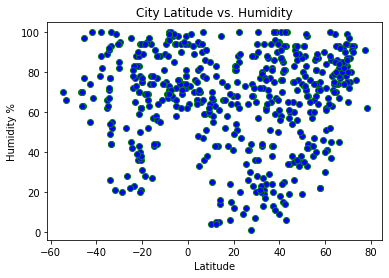

<Figure size 432x288 with 0 Axes>

In [12]:
x_axis = clean_city_data['Lat']
y_axis = clean_city_data['Humidity']
plt.scatter(x_axis, y_axis, marker="o", color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title("City Latitude vs. Humidity")
plt.show()
plt.savefig("images/humidity.png")

## Latitude vs. Cloudiness Plot

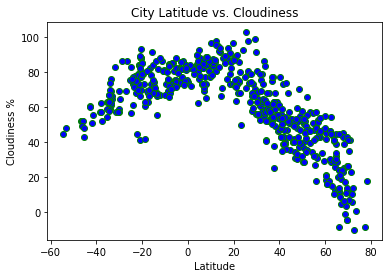

<Figure size 432x288 with 0 Axes>

In [13]:
x_axis = clean_city_data['Lat']
clouds = clean_city_data['Max Temp']
plt.scatter(x_axis, clouds, marker="o", color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title("City Latitude vs. Cloudiness")
plt.show()
plt.savefig("images/cloudiness.png")

## Latitude vs. Wind Speed Plot

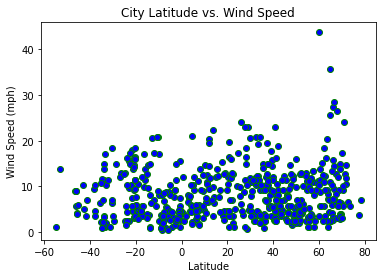

<Figure size 432x288 with 0 Axes>

In [14]:
x_axis = clean_city_data['Lat']
speed = clean_city_data['Wind Speed']
plt.scatter(x_axis, speed, marker="o", color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed")
plt.show()
plt.savefig("images/windspeed.png")

# # Linear Regression

In [15]:
#determine the north and south hemisphere to pull data from
north_hemisphere = clean_city_data.loc[clean_city_data['Lat'] >= 0]
#north_hemisphere
south_hemisphere = clean_city_data.loc[clean_city_data['Lat'] < 0]
#south_hemisphere

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

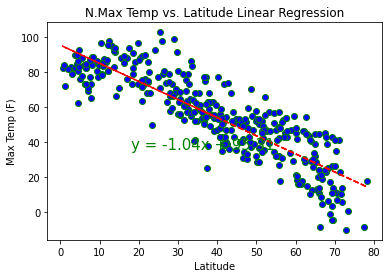

The r-squared value is 0.7551951918496207


<Figure size 432x288 with 0 Axes>

In [16]:
x_axis = north_hemisphere['Lat']
y_axis = north_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("N.Max Temp vs. Latitude Linear Regression")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.show()
print(f"The r-squared value is {rvalue**2}")
plt.savefig("images/n_maxtemp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

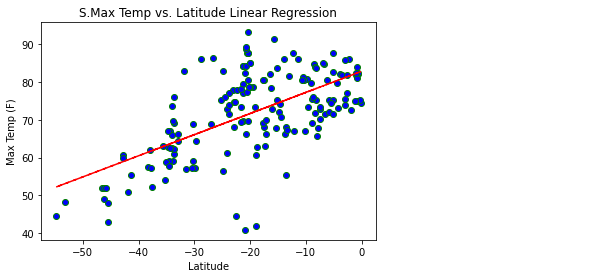

The r-squared value is 0.39791465762703304


<Figure size 432x288 with 0 Axes>

In [17]:
x_axis = south_hemisphere['Lat']
y_axis = south_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("S.Max Temp vs. Latitude Linear Regression")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.show()
print(f"The r-squared value is {rvalue**2}")
plt.savefig("images/s_maxtemp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

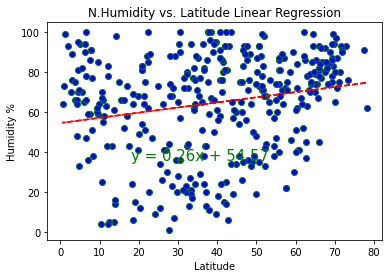

The r-squared value is 0.04356427335122029


<Figure size 432x288 with 0 Axes>

In [18]:
x_axis = north_hemisphere['Lat']
y_axis = north_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title("N.Humidity vs. Latitude Linear Regression")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.show()
print(f"The r-squared value is {rvalue**2}")
plt.savefig("images/n_humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

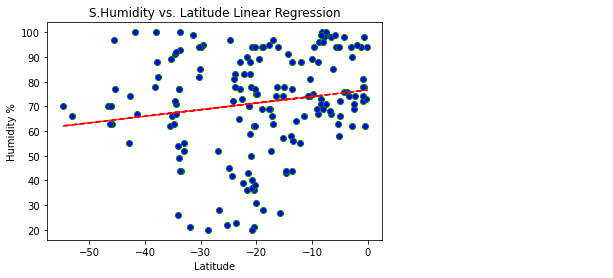

The r-squared value is 0.02771854706252175


<Figure size 432x288 with 0 Axes>

In [19]:
x_axis = south_hemisphere['Lat']
y_axis = south_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title("S.Humidity vs. Latitude Linear Regression")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.show()
print(f"The r-squared value is {rvalue**2}")
plt.savefig("images/s_humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

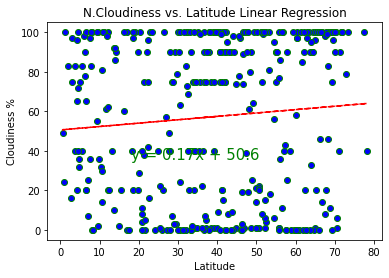

The r-squared value is 0.0073903072368007435


<Figure size 432x288 with 0 Axes>

In [20]:
x_axis = north_hemisphere['Lat']
y_axis = north_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title("N.Cloudiness vs. Latitude Linear Regression")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.show()
print(f"The r-squared value is {rvalue**2}")
plt.savefig("images/n_cloudines.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

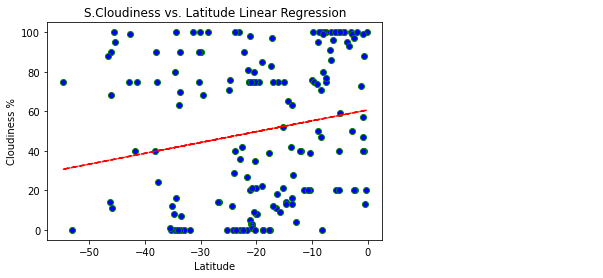

The r-squared value is 0.03511177550884245


<Figure size 432x288 with 0 Axes>

In [21]:
x_axis = south_hemisphere['Lat']
y_axis = south_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title("S.Cloudiness vs. Latitude Linear Regression")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.show()
print(f"The r-squared value is {rvalue**2}")
plt.savefig("images/s_cloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

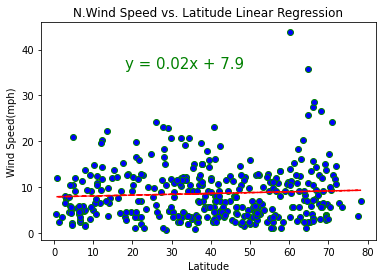

The r-squared value is 0.003934202712235572


<Figure size 432x288 with 0 Axes>

In [22]:
x_axis = north_hemisphere['Lat']
y_axis = north_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title("N.Wind Speed vs. Latitude Linear Regression")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.show()
print(f"The r-squared value is {rvalue**2}")
plt.savefig("images/n_windspeed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

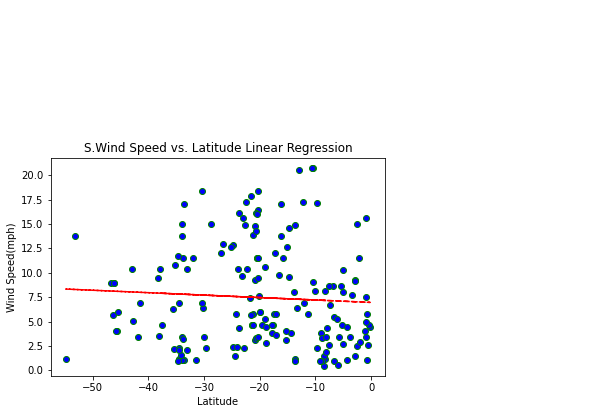

The r-squared value is 0.0038503254659552955


<Figure size 432x288 with 0 Axes>

In [23]:
x_axis = south_hemisphere['Lat']
y_axis = south_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, color='blue', edgecolor='green')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title("S.Wind Speed vs. Latitude Linear Regression")
plt.plot(x_axis,regress_values,"r--")
plt.annotate(line_eq,(18,36),fontsize=15,color="green")
plt.show()
print(f"The r-squared value is {rvalue**2}")
plt.savefig("images/s_windspeed.png")